In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Classified Data.csv',index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


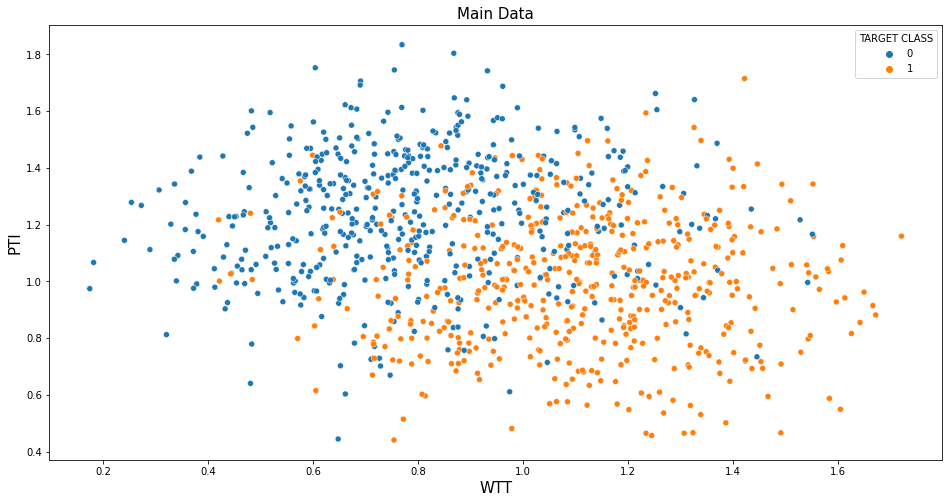

In [5]:
# plotting main data
import seaborn as sns
fig = plt.figure(figsize=(16,8))
ax2 = fig.add_subplot(1, 1, 1)
ax2=sns.scatterplot(df['WTT'],df['PTI'], hue=df['TARGET CLASS'])
ax2.set_xlabel('WTT', fontsize=15)
ax2.set_ylabel('PTI', fontsize=15)
ax2.set_title('Main Data', fontsize=15)
plt.savefig('df.png', dpi=300)

In [6]:
x=df.drop('TARGET CLASS',axis=1)
y=df['TARGET CLASS']

In [7]:
#scaled features
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [8]:
from sklearn.model_selection import train_test_split
[x_train,x_test,y_train,y_test]=train_test_split(x,y, test_size=0.25)

In [9]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
ss=QuantileTransformer()
x_train_scaled = ss.fit_transform(x_train, y_train)
x_test_scaled = ss.transform(x_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error 

In [11]:
train_accuracy=[]
test_accuracy=[]
error=[]
j=30
for i in range(1,j):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    pred_i=knn.predict(x_test_scaled)
    train_accuracy.append(knn.score(x_train_scaled, y_train) )
    test_accuracy.append(knn.score(x_test_scaled, y_test) )
    error.append(mean_squared_error(y_test, pred_i) )
print('K=',error.index(min(error))+1,' has min error. error=',min(error))
print('K=',test_accuracy.index(max(test_accuracy))+1,' has max test score. score=',max(test_accuracy))
k_best=error.index(min(error))+1

K= 12  has min error. error= 0.076
K= 12  has max test score. score= 0.924


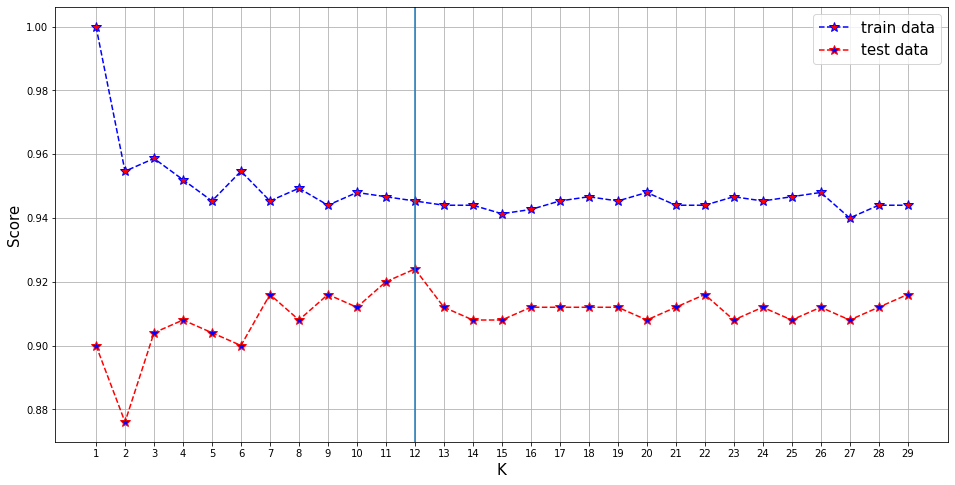

In [12]:
# plotting train_accuracy and test_accuracy
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(1,j),train_accuracy,linestyle='dashed',color='blue',marker='*',
         markerfacecolor='red',markersize=10, label='train data')
ax.plot(range(1,j),test_accuracy,linestyle='dashed',color='red',marker='*',
         markerfacecolor='blue',markersize=10, label='test data')
ax.set_xlabel('K', fontsize=15)
ax.legend(fontsize=15, loc='upper right')
ax.set_ylabel('Score', fontsize=15)
minor_ticks = np.arange(1, j, 1)
ax.set_xticks(minor_ticks)
ax.grid(which='minor', alpha=0.2)
ax.grid()
ax.axvline(k_best)
plt.savefig('KNN_n_train_test.png', dpi=300)

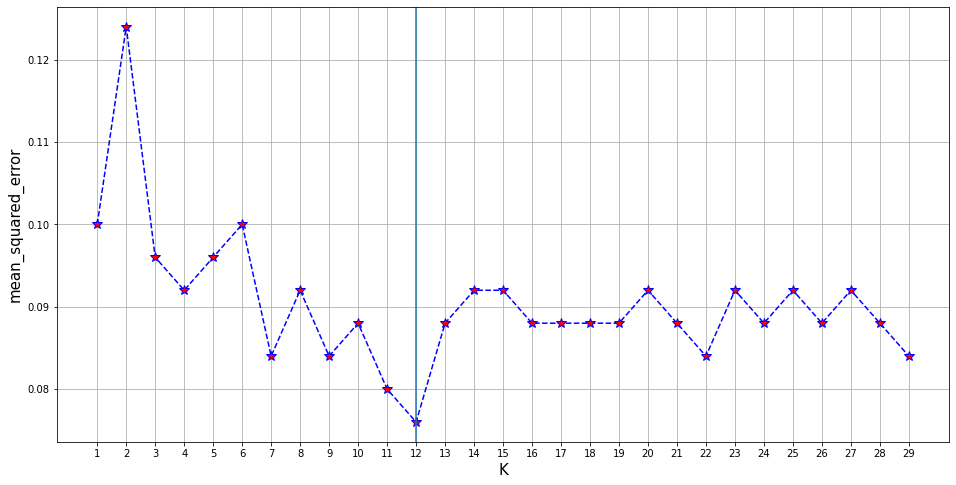

In [13]:
#plotting mean_squared_error
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(1,j),error,linestyle='dashed',color='blue',marker='*',
         markerfacecolor='red',markersize=10)
ax.set_xlabel('K', fontsize=15)
ax.set_ylabel('mean_squared_error', fontsize=15)
minor_ticks = np.arange(1, j, 1)
ax.set_xticks(minor_ticks)
ax.grid(which='minor', alpha=0.2)
ax.grid()
ax.axvline(k_best)
plt.savefig('MSE.png', dpi=300)

In [14]:
knn=KNeighborsClassifier(n_neighbors=k_best)
knn.fit(x_train_scaled,y_train)
pred=knn.predict(x_test_scaled)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

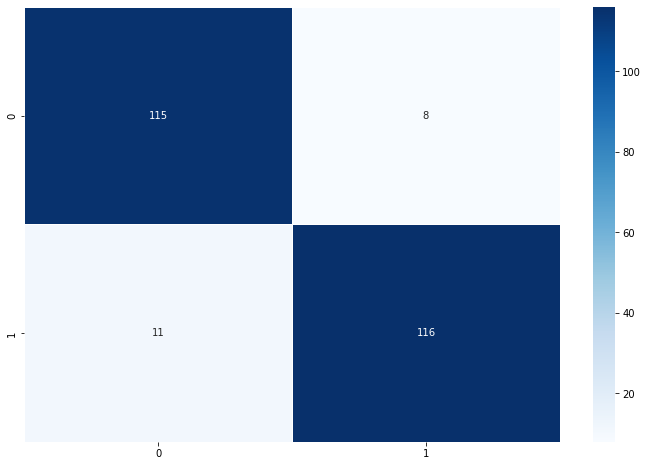

In [16]:
plt.figure(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', cmap = "Blues")
plt.savefig('CM.jpg', dpi=300)

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       123
           1       0.94      0.91      0.92       127

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [18]:
def knn_comparison(data,target,x,y):
    [x_train, x_test, y_train, y_test]=train_test_split(data,target, test_size=0.25)
    ss=QuantileTransformer()
    x_train_scaled = ss.fit_transform(x_train, y_train)
    x_test_scaled = ss.transform(x_test)
    df_x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
    df_x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
    k=4
    clf = KNeighborsClassifier(n_neighbors= k )
    clf.fit(df_x_train_scaled[[x,y]], y_train)
    plot_decision_regions(df_x_test_scaled[[x,y]].values, np.array(y_test)
                          , clf=clf, legend=2)
    print(clf.score(df_x_test_scaled[[x,y]], y_test))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Knn with K="+ str(k))
    plt.savefig('KNN.png', dpi=300)
    plt.show()
    

0.772


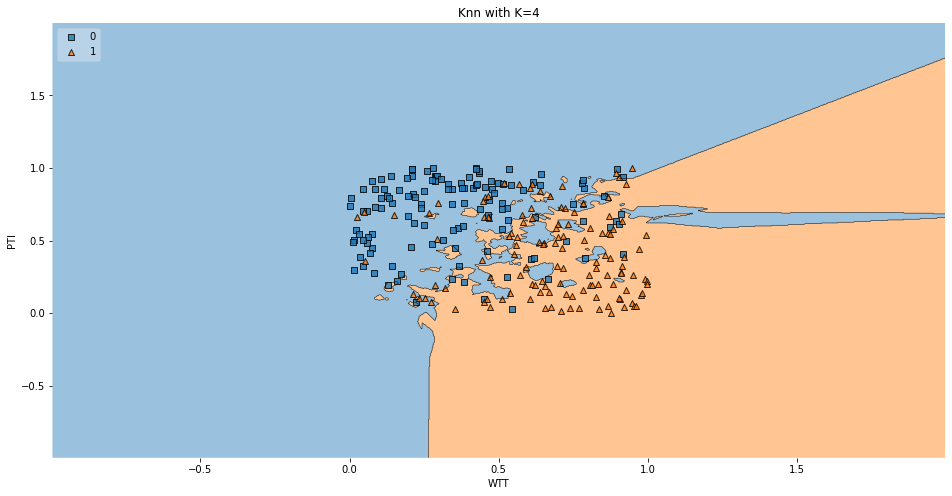

In [19]:
# ploting decision region. 
# Note that this is not the decision region for the abovementioned classification. The following KNN is trained with only two features
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(16,8))
knn_comparison(x,y,'WTT','PTI')